In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data and plot graph
%matplotlib inline
import seaborn as sns #seaborn-make every graph attractive

In [ ]:
df=pd.read_csv('/content/Diwali Sales Data.csv',encoding='unicode_escape')
df.shape

(11251, 15)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#Drop unrelated and blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True) #drop,axis=1,inplace=True


In [ ]:
#check for null values
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
#drop null values
df.dropna(inplace=True)

In [ ]:
#change data type
df['Amount']=df['Amount'].astype('int')  #astype['int] consider amount as integer
df['Amount'].dtypes #find data type of data

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df.rename(columns={'Marital_Status':'Shaadi'},inplace=True)

In [ ]:
df.rename(columns={'Shaadi':'Marriage'},inplace=True)

In [ ]:
df.describe()


,User_ID,Age,Marriage,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


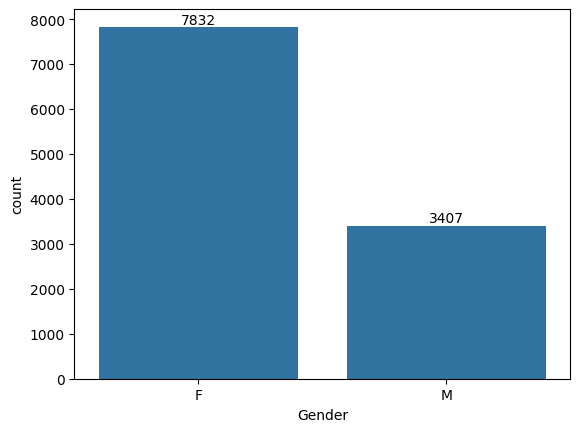

In [ ]:
#EDA Part
#plotting bar char for Gender and its count
#Gender
ax=sns.countplot(x='Gender',data=df)  #calling seaborn draw plot on basis of gender and given data
for bars in ax.containers:  #create a bar graph in which the data will be stored inside a container
  ax.bar_label(bars)   #label them as bars

<Axes: xlabel='Gender', ylabel='Amount'>

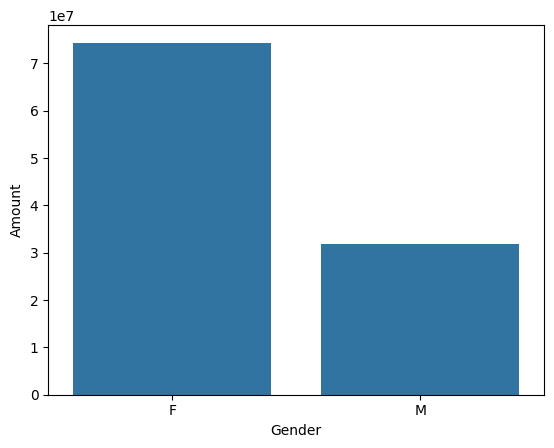

In [ ]:
#plotting bar chart for gender vs total amount
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) #group by gender and amount and count sum of amount and sort values in descending order
sns.barplot(x='Gender',y='Amount',data=sales_gen) #plot bargraph and give labels for x and y

<Axes: xlabel='Age Group', ylabel='Amount'>

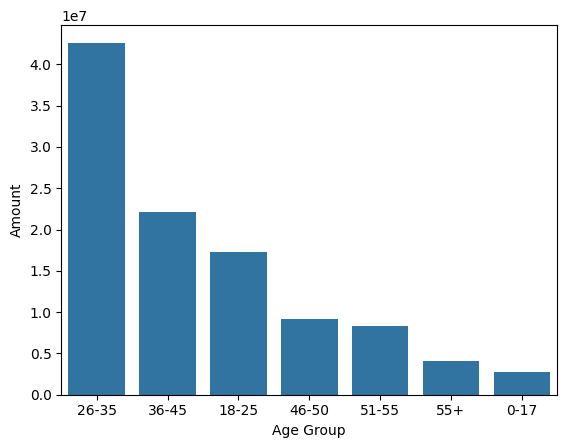

In [ ]:
#Age group vs amount
sales_gen=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) #group by gender and amount and count sum of amount and sort values in descending order
sns.barplot(x='Age Group',y='Amount',data=sales_gen)

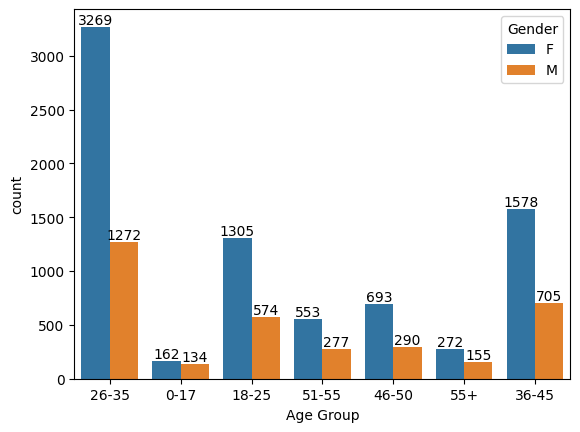

In [ ]:
#Countplot of age group along with gender
ax=sns.countplot(x='Age Group',data=df,hue='Gender')  #calling seaborn draw plot on basis of gender and given data
for bars in ax.containers:  #create a bar graph in which the data will be stored inside a container
  ax.bar_label(bars)

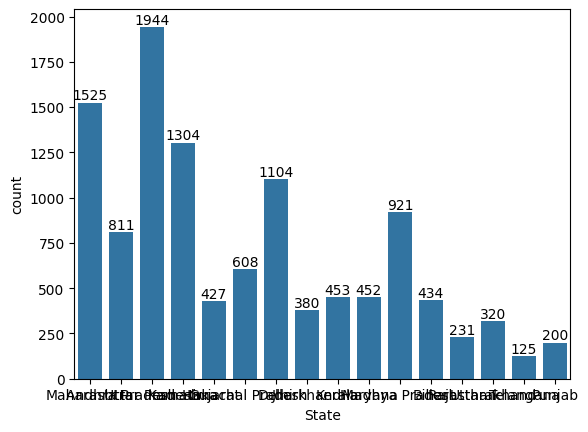

In [ ]:
#Countplot of states
ax=sns.countplot(x='State',data=df)  #calling seaborn draw plot on basis of gender and given data
for bars in ax.containers:  #create a bar graph in which the data will be stored inside a container
  ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Orders'>

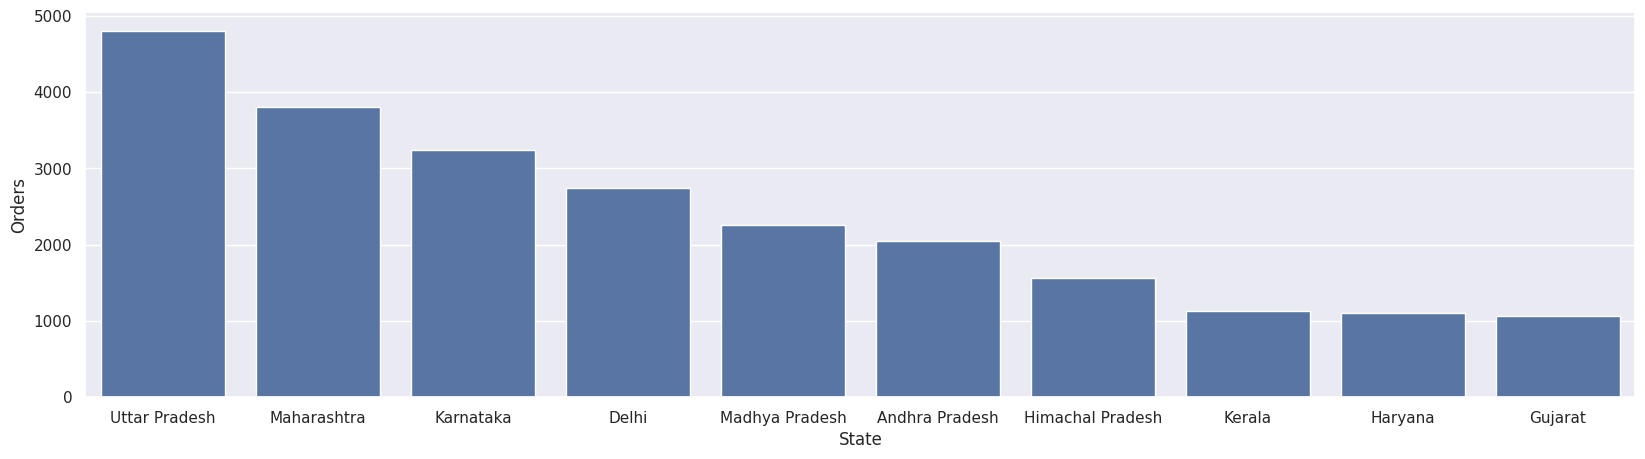

In [ ]:
#State vs orders
sales_gen=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10) #group by gender and amount and count sum of amount and sort values in descending order use .head() to select fixed number of bars
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Orders',data=sales_gen)

<Axes: xlabel='State', ylabel='Amount'>

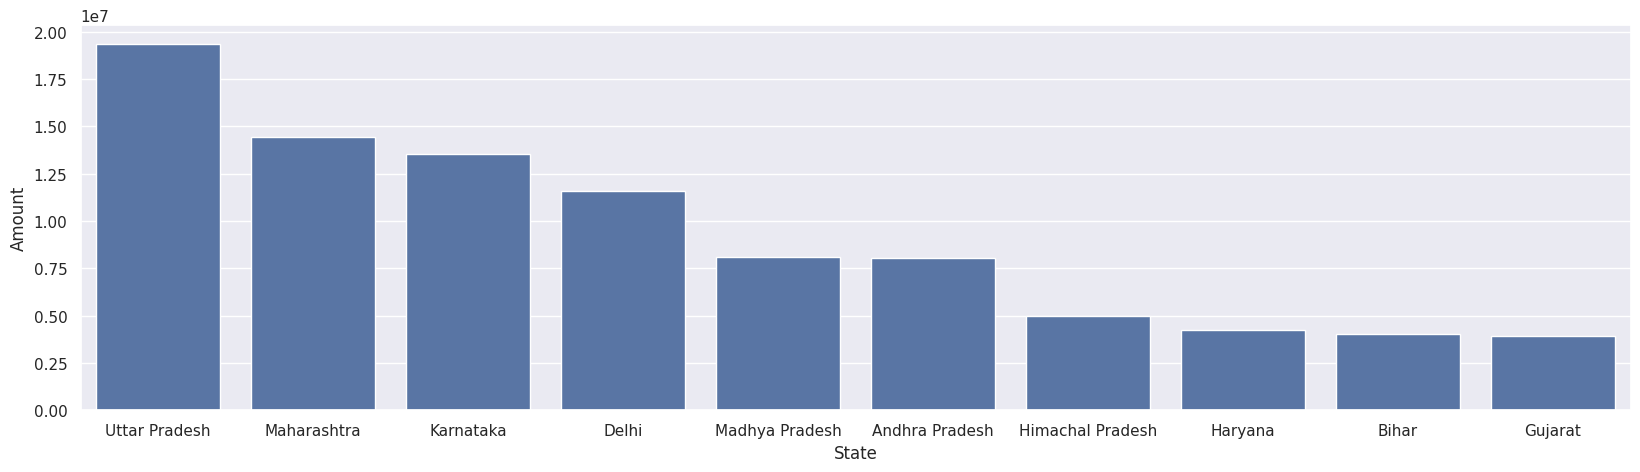

In [ ]:
#States vs amount
sales_gen=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10) #group by gender and amount and count sum of amount and sort values in descending order use .head() to select fixed number of bars
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Amount',data=sales_gen)

<Axes: xlabel='State', ylabel='Marriage'>

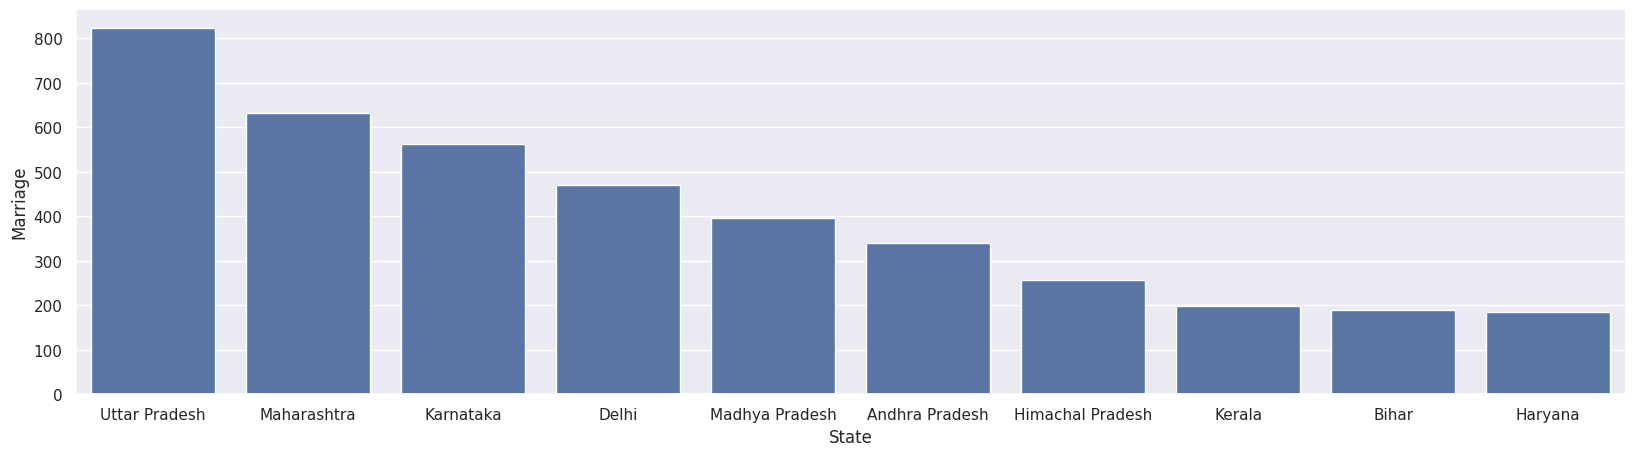

In [ ]:
#State vs marriage
sales_gen=df.groupby(['State'],as_index=False)['Marriage'].sum().sort_values(by='Marriage',ascending=False).head(10) #group by gender and amount and count sum of amount and sort values in descending order use .head() to select fixed number of bars
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Marriage',data=sales_gen)

<Axes: xlabel='Marriage', ylabel='Amount'>

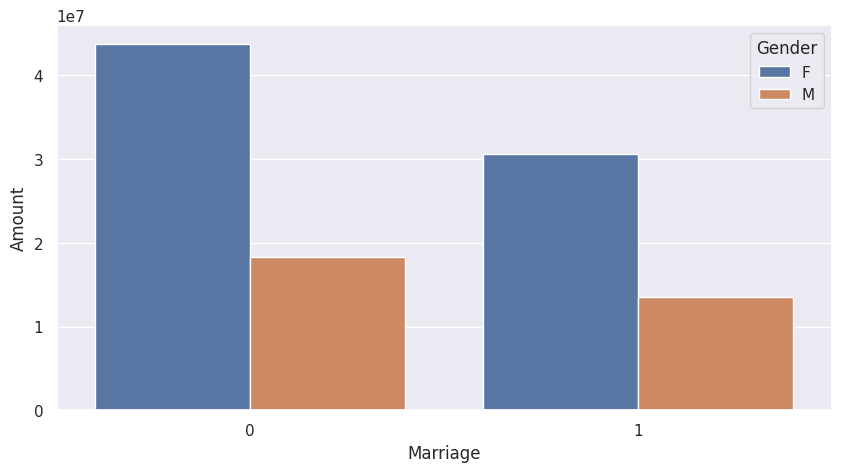

In [ ]:
#Marriage vs amount with gender
sales_gen=df.groupby(['Marriage','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) #group by gender and amount and count sum of amount and sort values in descending order use .head() to select fixed number of bars
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Marriage',y='Amount',hue='Gender',data=sales_gen)

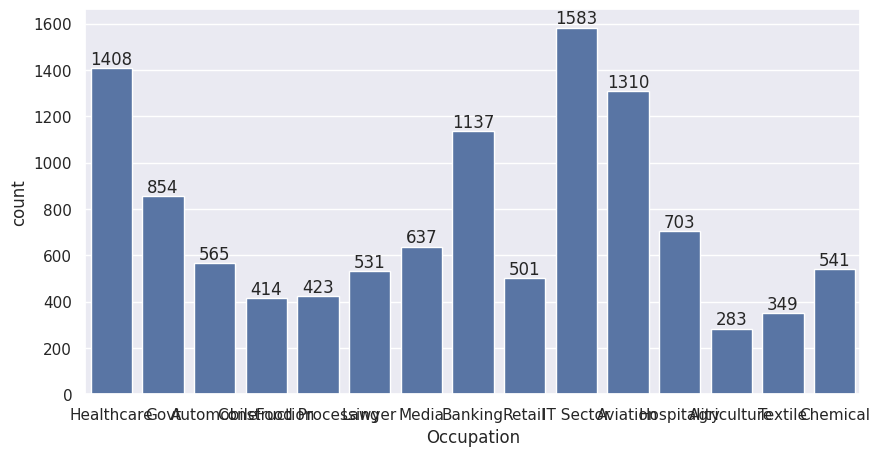

In [ ]:
#countplot of occupation
ax=sns.countplot(x='Occupation',data=df)
sns.set(rc={'figure.figsize':(28,5)} ) #calling seaborn draw plot on basis of gender and given data
for bars in ax.containers:  #create a bar graph in which the data will be stored inside a container
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

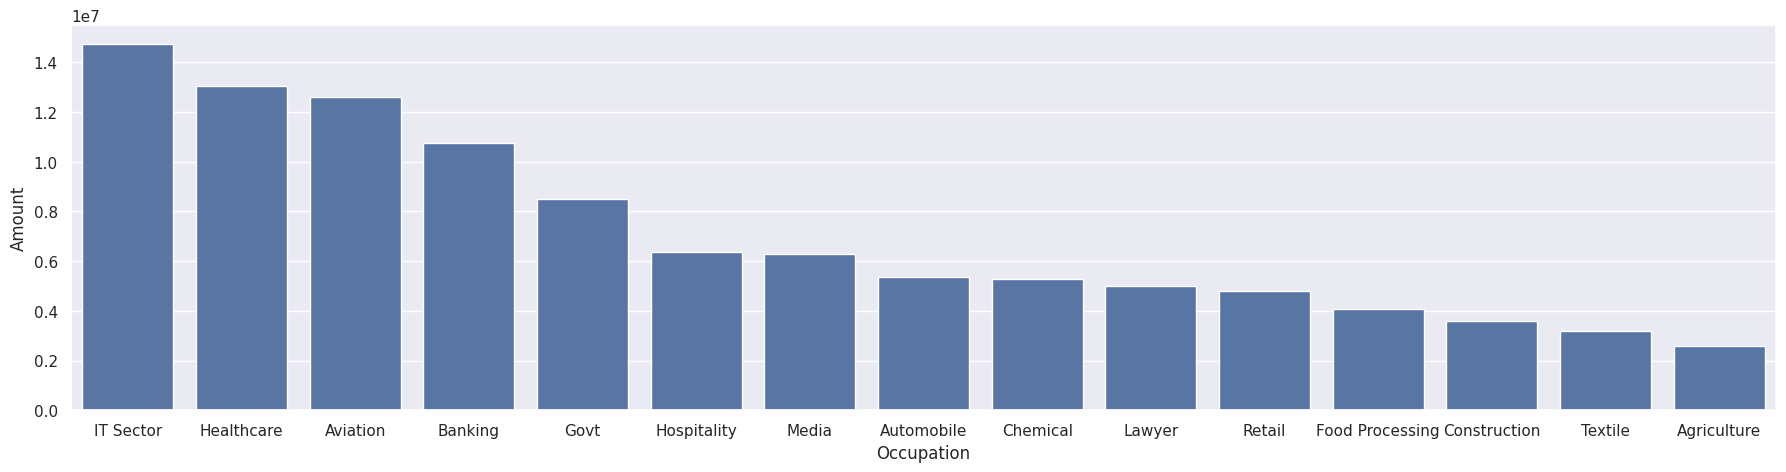

In [ ]:
#Occupation vs amount
sales_gen=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) #group by gender and amount and count sum of amount and sort values in descending order use .head() to select fixed number of bars
sns.set(rc={'figure.figsize':(22,5)})
sns.barplot(x='Occupation',y='Amount',data=sales_gen)

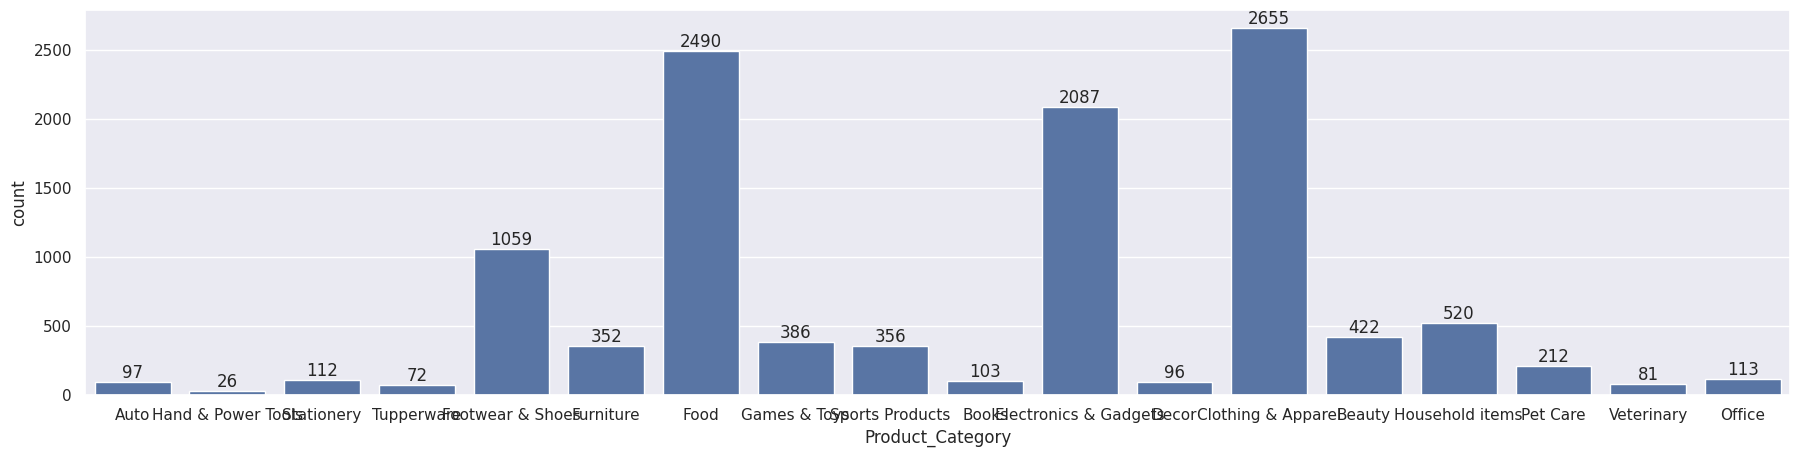

In [ ]:
#countplot of product category
ax=sns.countplot(x='Product_Category',data=df)
sns.set(rc={'figure.figsize':(30,7)} ) #calling seaborn draw plot on basis of gender and given data
for bars in ax.containers:  #create a bar graph in which the data will be stored inside a container
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

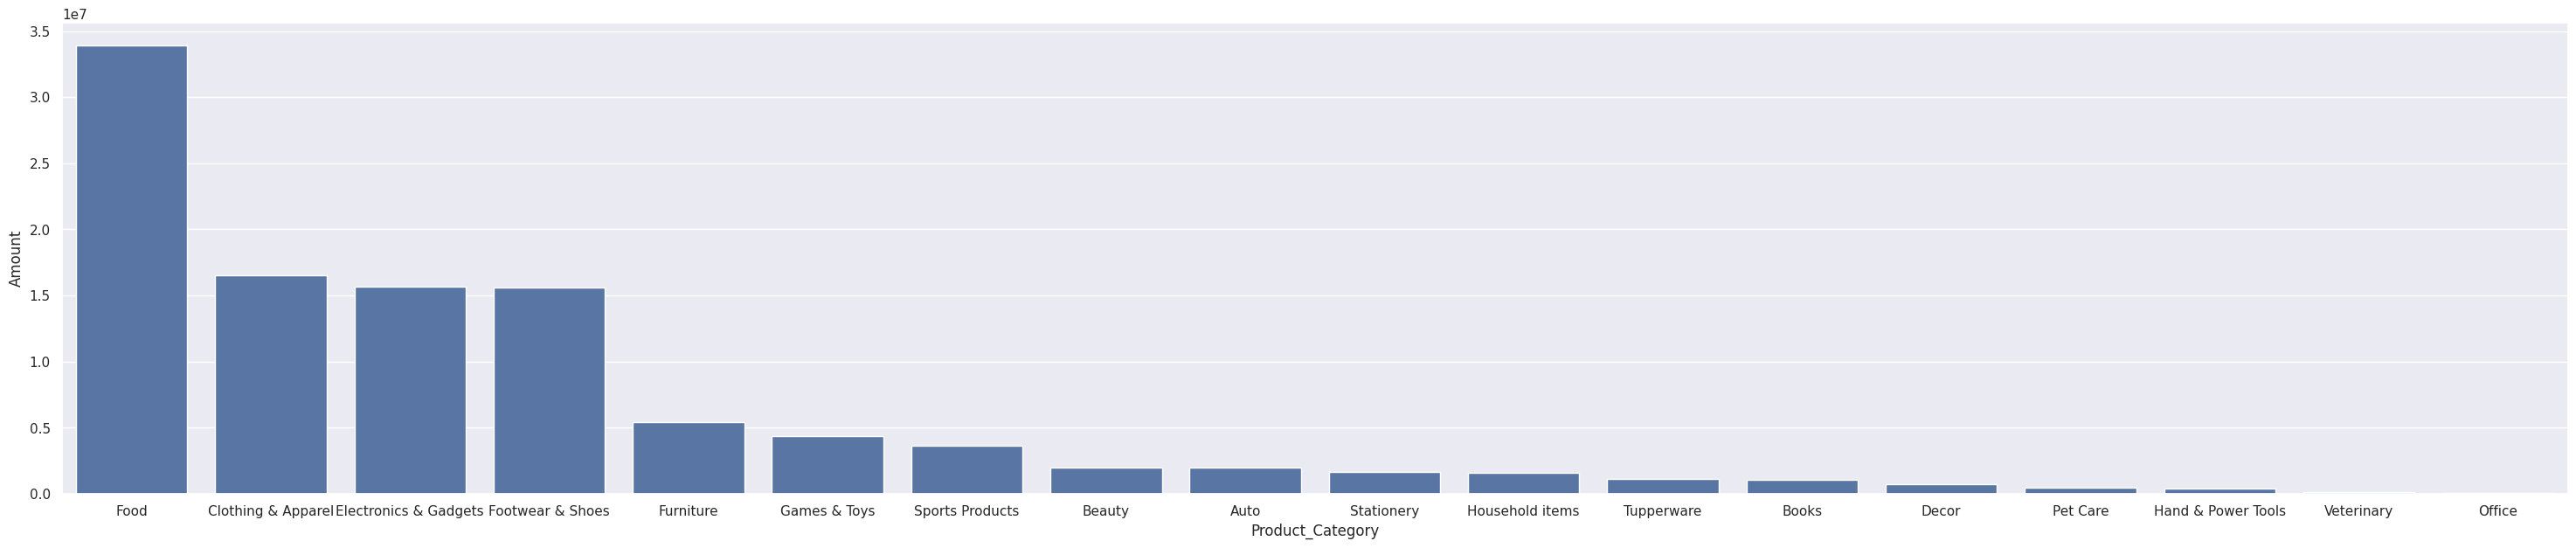

In [ ]:
#Product category vs amount
sales_gen=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) #group by gender and amount and count sum of amount and sort values in descending order use .head() to select fixed number of bars
sns.set(rc={'figure.figsize':(37,7)})
sns.barplot(x='Product_Category',y='Amount',data=sales_gen)

<Axes: xlabel='Product_ID', ylabel='Orders'>

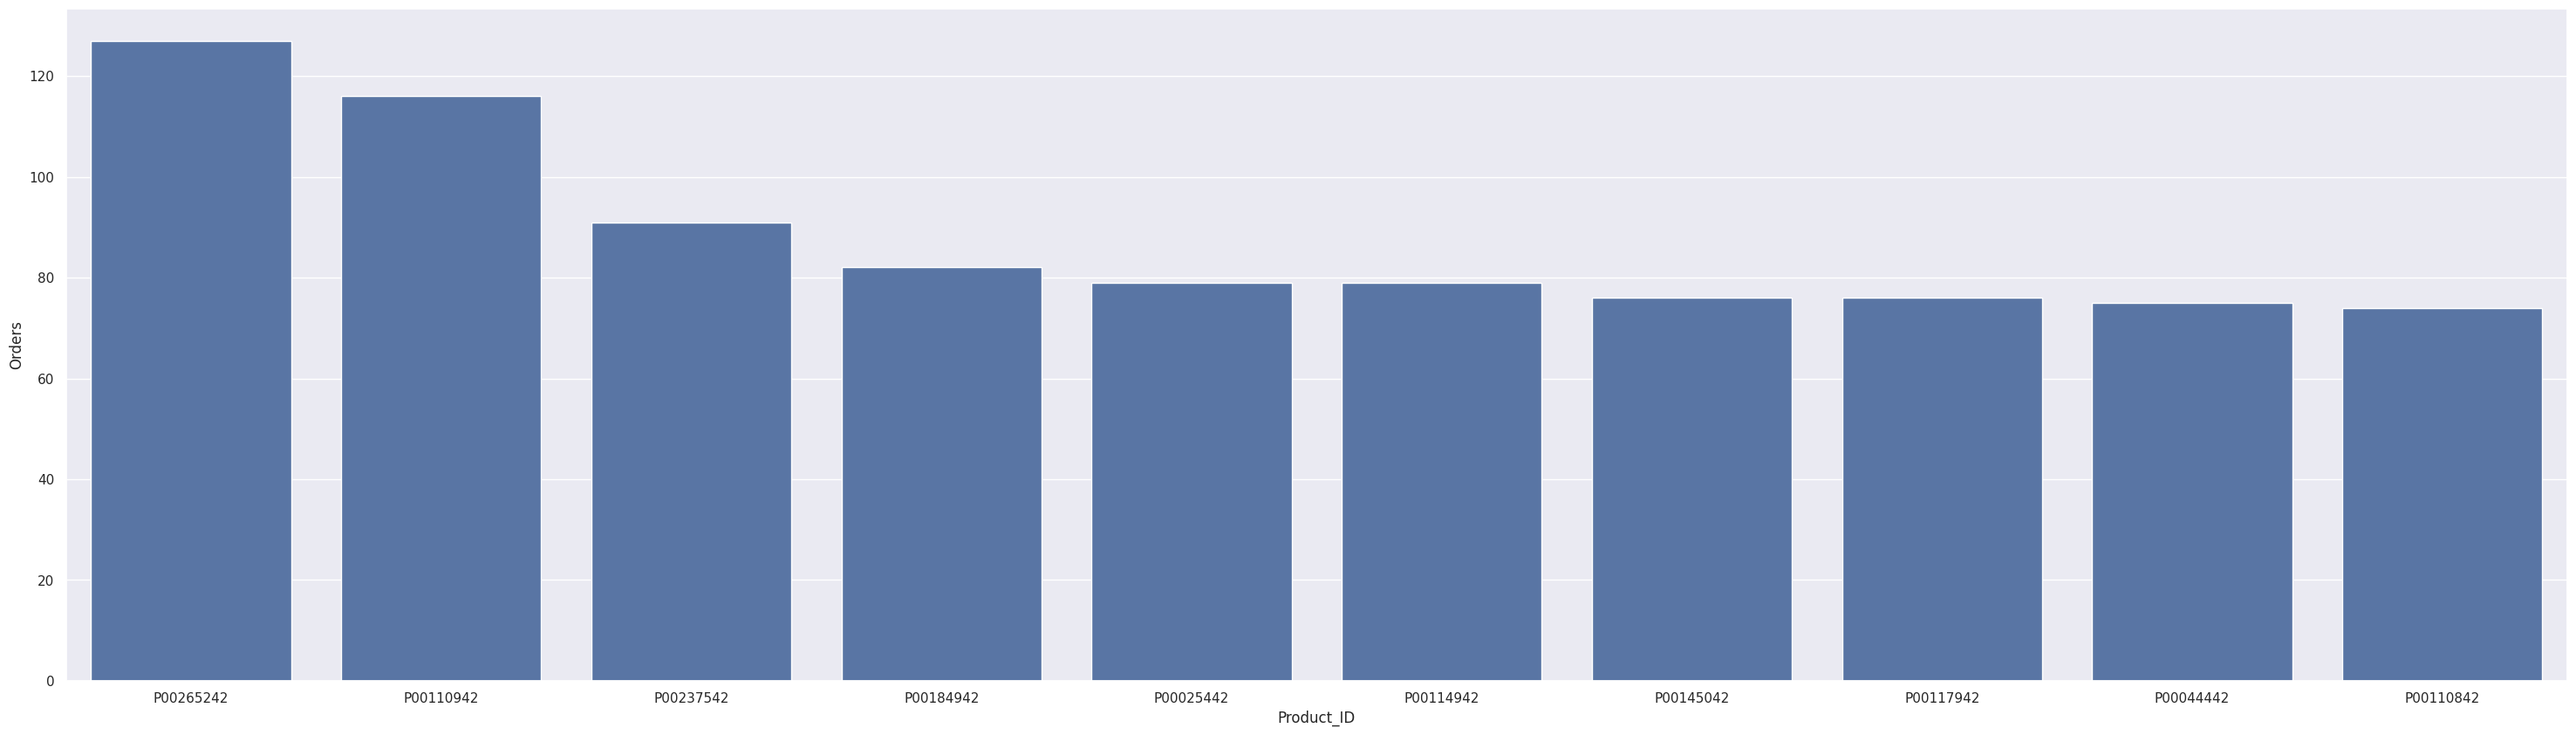

In [ ]:
#Total number of orders based on product id
sales_gen=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10) #group by gender and amount and count sum of amount and sort values in descending order use .head() to select fixed number of bars
sns.set(rc={'figure.figsize':(37,10)})
sns.barplot(x='Product_ID',y='Orders',data=sales_gen)